# Week 01 - Data Pre-Processing

## Aims

By the end of this notebook you will 

* understand and play with the different aspects of data pre-processing
* be familiar with tools for exploratory data analysis and visualization
* understand the basics of feature engineering

## Topics and Instructions

1. [Problem Definition and Setup](#setup)

2. [Exploratory Data Analysis](#eda)

3. [Data Preprocessing](#prep)

4. [Feature Engineering](#engin)

5. [Summary](#sum)

In lecture this week, we reviewed the general **machine learning pipline**, which following the ["Machine Learning Project Checklist"](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md) of Geron (2019) can be stuctured as:

>- Frame the problem and look at the big picture.
>- Get the data.
>- Explore the data and gain insights.
>- Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
>- Explore many different models and shortlist the best ones.
>- Fine-tune your models and combine them into a great solution.
>- Present your solution.
>- Launch, monitor, and mantain your system.

In this week's workshop, we will focus on the initial steps of this pipeline, that is on, data pre-processing, exploratory data analysis and feature engineering.

During workshops, you will complete the worksheets together in teams of 2-3, using **pair programming**. During the first few weeks, the worksheets will contain cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.
>- In some Exercises, you will see some beneficial hints at the bottom of questions.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday of the week the workshop was given. 

# Problem Definition and Setup <a id='setup'></a>

## Packages

Now lets load in some packages to get us started. The following are widely used libraries to start working with Python in general.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

If you need to install any packages from scratch, you need to install the related library before calling it. For instance, [feature-engine](https://feature-engine.trainindata.com/en/latest/) is a Python library for Feature Engineering and Selection, which: 

- contains multiple transformers to engineer and select features to use in machine learning models.

- preserves scikit-learn functionality with methods fit() and transform() to learn parameters from and then transform the data.

In [ ]:
# To install the feature-engine library (if not already installed)
# !pip install feature-engine

In some cases, we may need only a component of the whole library. If this is the case, it is possible to import specific things from a module (library), using the following line of code:

In [4]:
from feature_engine.imputation import DropMissingData

## Problem

Now, it is time move on to the next step.

> Welcome to Machine Learning Housing Corporation! The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
>
> **Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.**
>
> The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. **How does the company expect to use and benefit from this model?** This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.
>
> The next question to ask is **what the current solution looks like (if any)**. It will often give you a reference performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.
>
> This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district. The census data looks like a great dataset to exploit for this purpose, since it includes the median housing prices of thousands of districts, as well as other data.

---

### 🚩 Exercise 1 (CORE)

Using the information above answer the following questions about how you may design your machine learning system.

a) Is this a supervised or unsupervised learning task? 

Supervised learning

b) Is this a classification, regression, or some other task?

Regression

c) Suppose you are only required to predict if a district's median housing prices are "cheap," "medium," or "expensive". Will this be the same or a different task?

The task remains supervised learning but is now a classification task.

## Data Download

The data we will be using this week is a modified version of the California Housing dataset. We can get the data a number of ways. The easiest is just to load it from the working directory that we are working on (where we have already downloaded it to).

In [5]:
housing = pd.read_csv("housing.csv")
housing.head()
housing['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Exploratory Data Analysis <a id='eda'></a>

In this section we are going to start with exploring the California Housing data using methods that you will likely already be familiar with.

Data can come in a broad range of forms encompassing a collection of discrete objects, numbers, words, events, facts, measurements, observations, or even descriptions of things. Processing data using exploratory data analysis (EDA) can elicit useful information and knowledge by examining the available dataset to discover patterns, spot anomalies, test hypotheses, and check assumptions. 

Let's start by examining the [Data Dictionary](https://www.kaggle.com/camnugent/california-housing-prices) and the variables available:

> `longitude`: A measure of how far west a house is; a higher value is farther west
>
> `latitude`: A measure of how far north a house is; a higher value is farther north
>
> `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
>
> `totalRooms`: Total number of rooms within a block
>
> `totalBedrooms`: Total number of bedrooms within a block
>
> `population`: Total number of people residing within a block
>
> `households`: Total number of households, a group of people residing within a home unit, for a block
>
> `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
>
> `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
>
> `oceanProximity`: Location of the house w.r.t ocean/sea

### 🚩 Exercise 2 (CORE)

a) Examine the datatypes for each column calling [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). What is the total number of observations and total number of variables? What is the type of each variable?

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20640 observations. There are 10 variables, all of which are floats apart from ocean_proximity, which is 'object' (it's a categorical variable with 5 categories).

b) From the information provided above, can you anticipate any data cleaning we may need to do?

'total_bedrooms' has some null values, so we should expect to have to clearn those values. Additionally, we expect to have to encode the 'ocean_proximity' variable in some manner, as it is not a float at present. Likely this will be done via one-hot encoding as this is a categorical variable.

### 🚩 Exercise 3  (CORE)

a) Use descriptive statistics and histograms to examine the distributions of the numerical attributes.
<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- <code>.describe()</code> can be used to create summary descriptive statistics on a pandas dataframe.
- You can use a [<code>sns.histplot</code>](https://seaborn.pydata.org/generated/seaborn.histplot.html) to create histograms
    
</details>

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


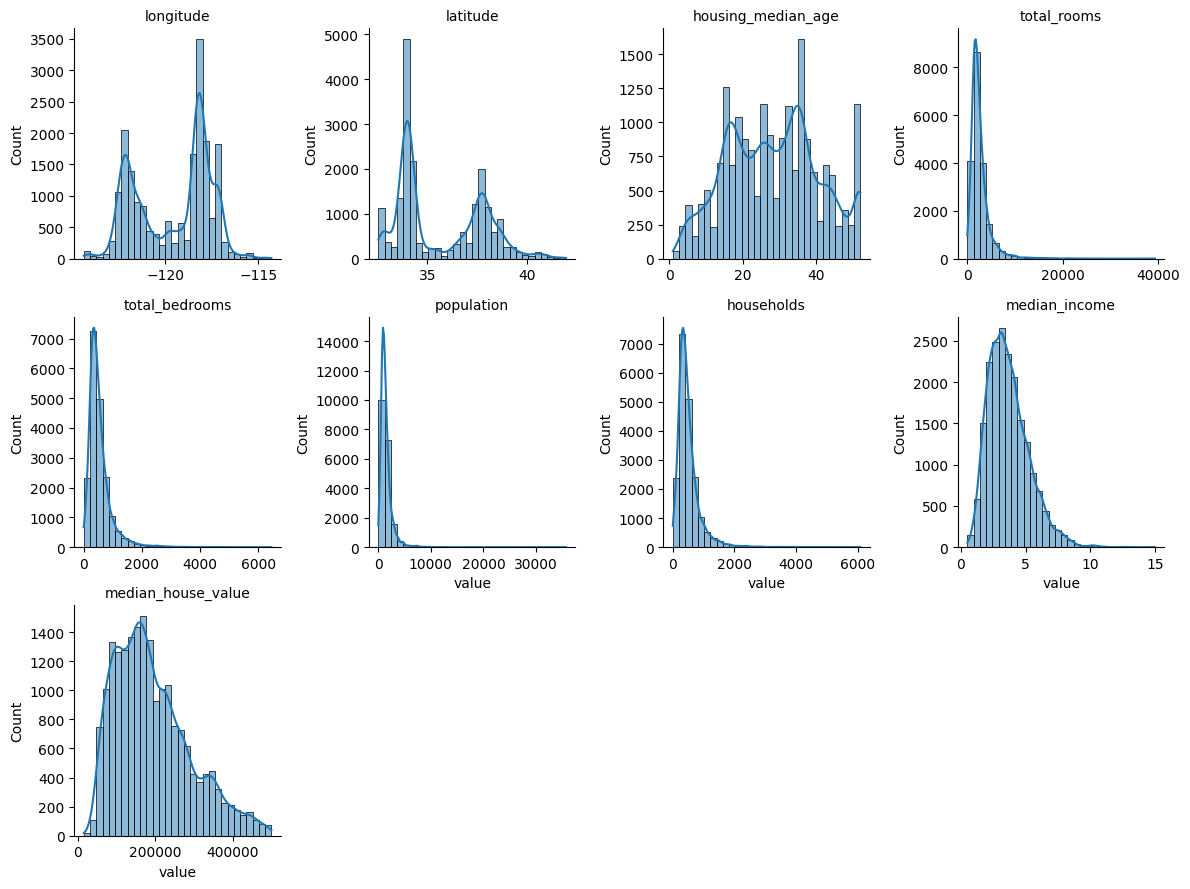

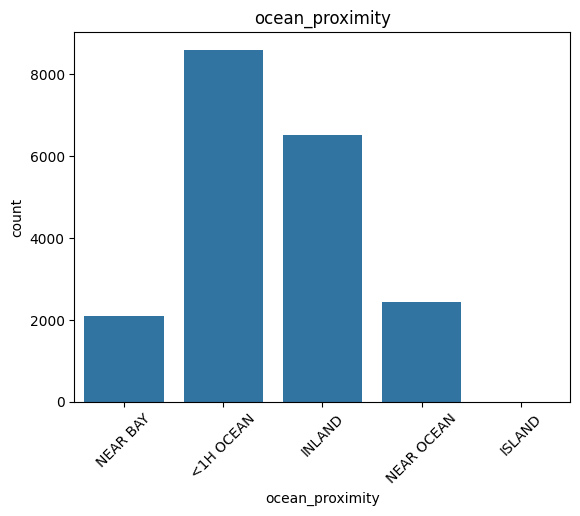

In [21]:
numerical_columns = housing.select_dtypes(include=['float64']).columns

g = sns.FacetGrid(pd.melt(housing, value_vars=numerical_columns), col="variable", col_wrap=4, sharex=False, sharey=False)

g.map(sns.histplot, "value", bins=30, kde=True)

# Adjust the layout
g.set_titles("{col_name}")
g.tight_layout()

# Show the plot
plt.show()
sns.countplot(data=housing, x='ocean_proximity')
plt.title('ocean_proximity')
plt.xticks(rotation=45)

plt.show()

b) Can you identify other pre-processing/feature engineering steps we may need to do?

Firstly, there seem to be multiple features which are 'capped' (have a high number of records in the maximum bin). We will likely have to delete these rows as we do not know how high the values truly are. Additionally, there are multiple columns which have values highly concentrated at small values, with positive skew. We will likely want to transform these features, possibly with a log-transform. Finally, we will have to one-hot encode the ocean_proximity feature, and also deal with the null values in total_bedrooms. We have enough data points so that it seems reasonable to simply delete these rows.

c) One thing you may have noticed from the histogram is that the median income, housing median age, and the median house value are capped. The median house value capping (this being our target value) may or may not be a problem depending on your client. If we needed precise predictions beyond $\$500,000$, we may need to either collect proper labels/outputs for the districts whose labels were capped or remove these districts from the data. Following the latter, remove all districts whose median house value is capped. How many observations are there now?

In [9]:
# Remove the cases where median_house_value >= 500,000$
housing = housing[housing["median_house_value"] < 500000]
print('There are now '+str(len(housing))+' data points.')

There are now 19648 data points.



### 🚩 Exercise 4 (CORE)

What are the possible categories for the `ocean_proximity` variable? Are the number of instances in each category similar? 
<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- [<code>value_counts()</code>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) can be used to count the values of the categories a pandas series.
- You can use a [<code>sns.countplot</code>](https://seaborn.pydata.org/generated/seaborn.countplot.html) to create barplot with the number of instances of each category 
    
</details>

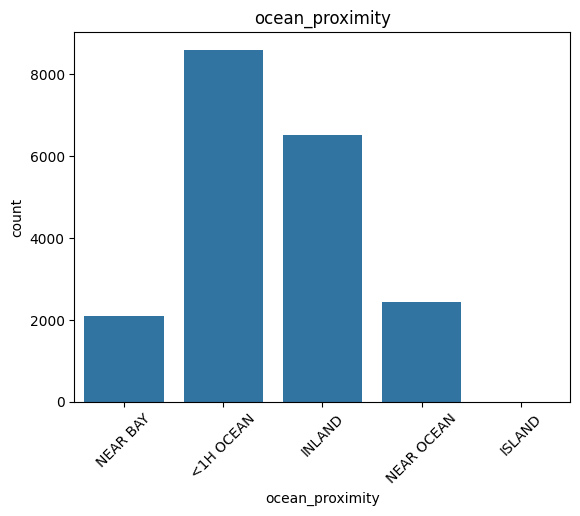

ocean_proximity
<1H OCEAN     8595
INLAND        6523
NEAR OCEAN    2437
NEAR BAY      2088
ISLAND           5
Name: count, dtype: int64

In [10]:
sns.countplot(data=housing, x='ocean_proximity')
plt.title('ocean_proximity')
plt.xticks(rotation=45)

plt.show()
housing['ocean_proximity'].value_counts()


As before, there are 5 categories. The number of observations in each category varies drastically. There are 8595 observations in the modal category, '<1H OCEAN', while there are only 5 observations in 'ISLAND'. This could become problematic as the small number of island observations may not be representative of future island observations. Additionally, these observations will be dominated in predictions by the categories with larger counts.

🏁 **Now, is a good point to switch driver and navigator**

### 🚩 Exercise 5 (CORE)

Examine if/which of the features are correlated to each other. Are any of the features correlated with our output (`median_house_value`) variable?

- Can you think of any reason why certain features may be correlated?

- How might we use this information in later steps of our model pipeline?

<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- <code>.corr()</code> can be used to compute the correlations.
- You can use a [<code>sns.heatmap</code>](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize the correlations
    
</details>

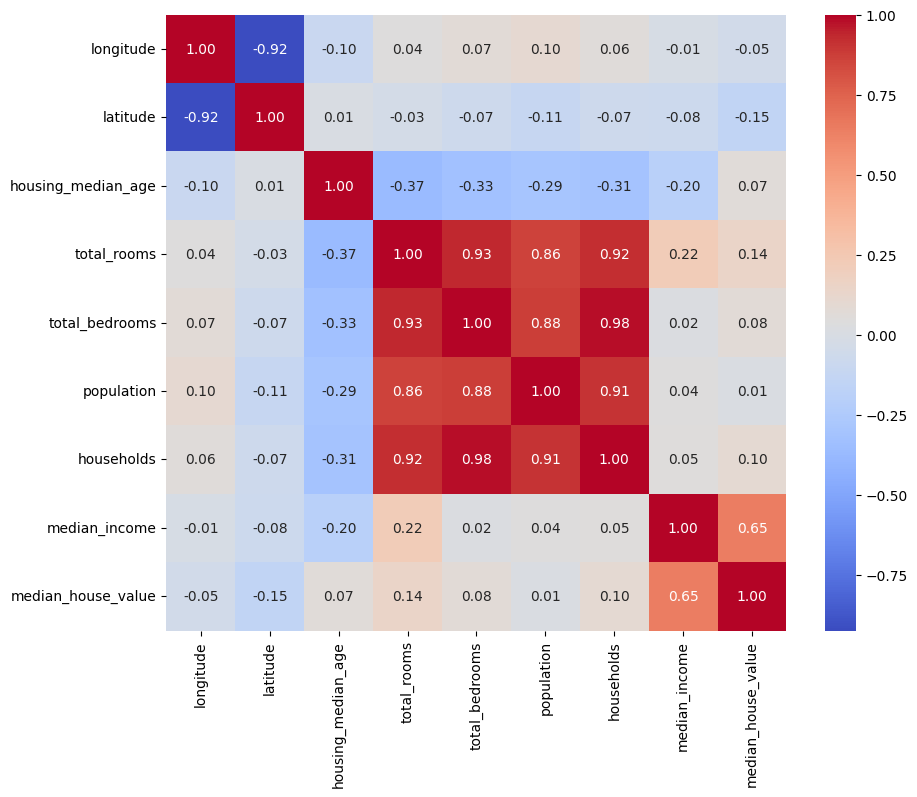

In [11]:
corr_matrix = housing[numerical_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.show()

Firstly, total_rooms, total_bedrooms, population and households are all highly positively correlated. This makes intuitive sense: If a district houses more people, we would expect it to have more households, more bedrooms, and more rooms in general. These four columns are all negatively correlated with housing_median_age, which again makes sense: younger people may be less likely to have 'spare rooms' and so the districts containing more young people are unlikely to contain quite so many rooms and bedrooms.

We may want to simplify the model, combining the four highly positively correlated columns into one datafield. For example, if we already have total_rooms, we may not also need total_bedrooms - how much extra information does this really give us?

median_income is the most highly correlated feature with median_house_value. There are some other, less significant, correlations including a positive correlation with total_rooms, and a negative correlation with latitude.

### 🚩 Exercise 6 (CORE)

Use `sns.pairplot` to further investigate the joint relationship between each pair of variables. What insights into the data might this provide over looking only at the correlation?

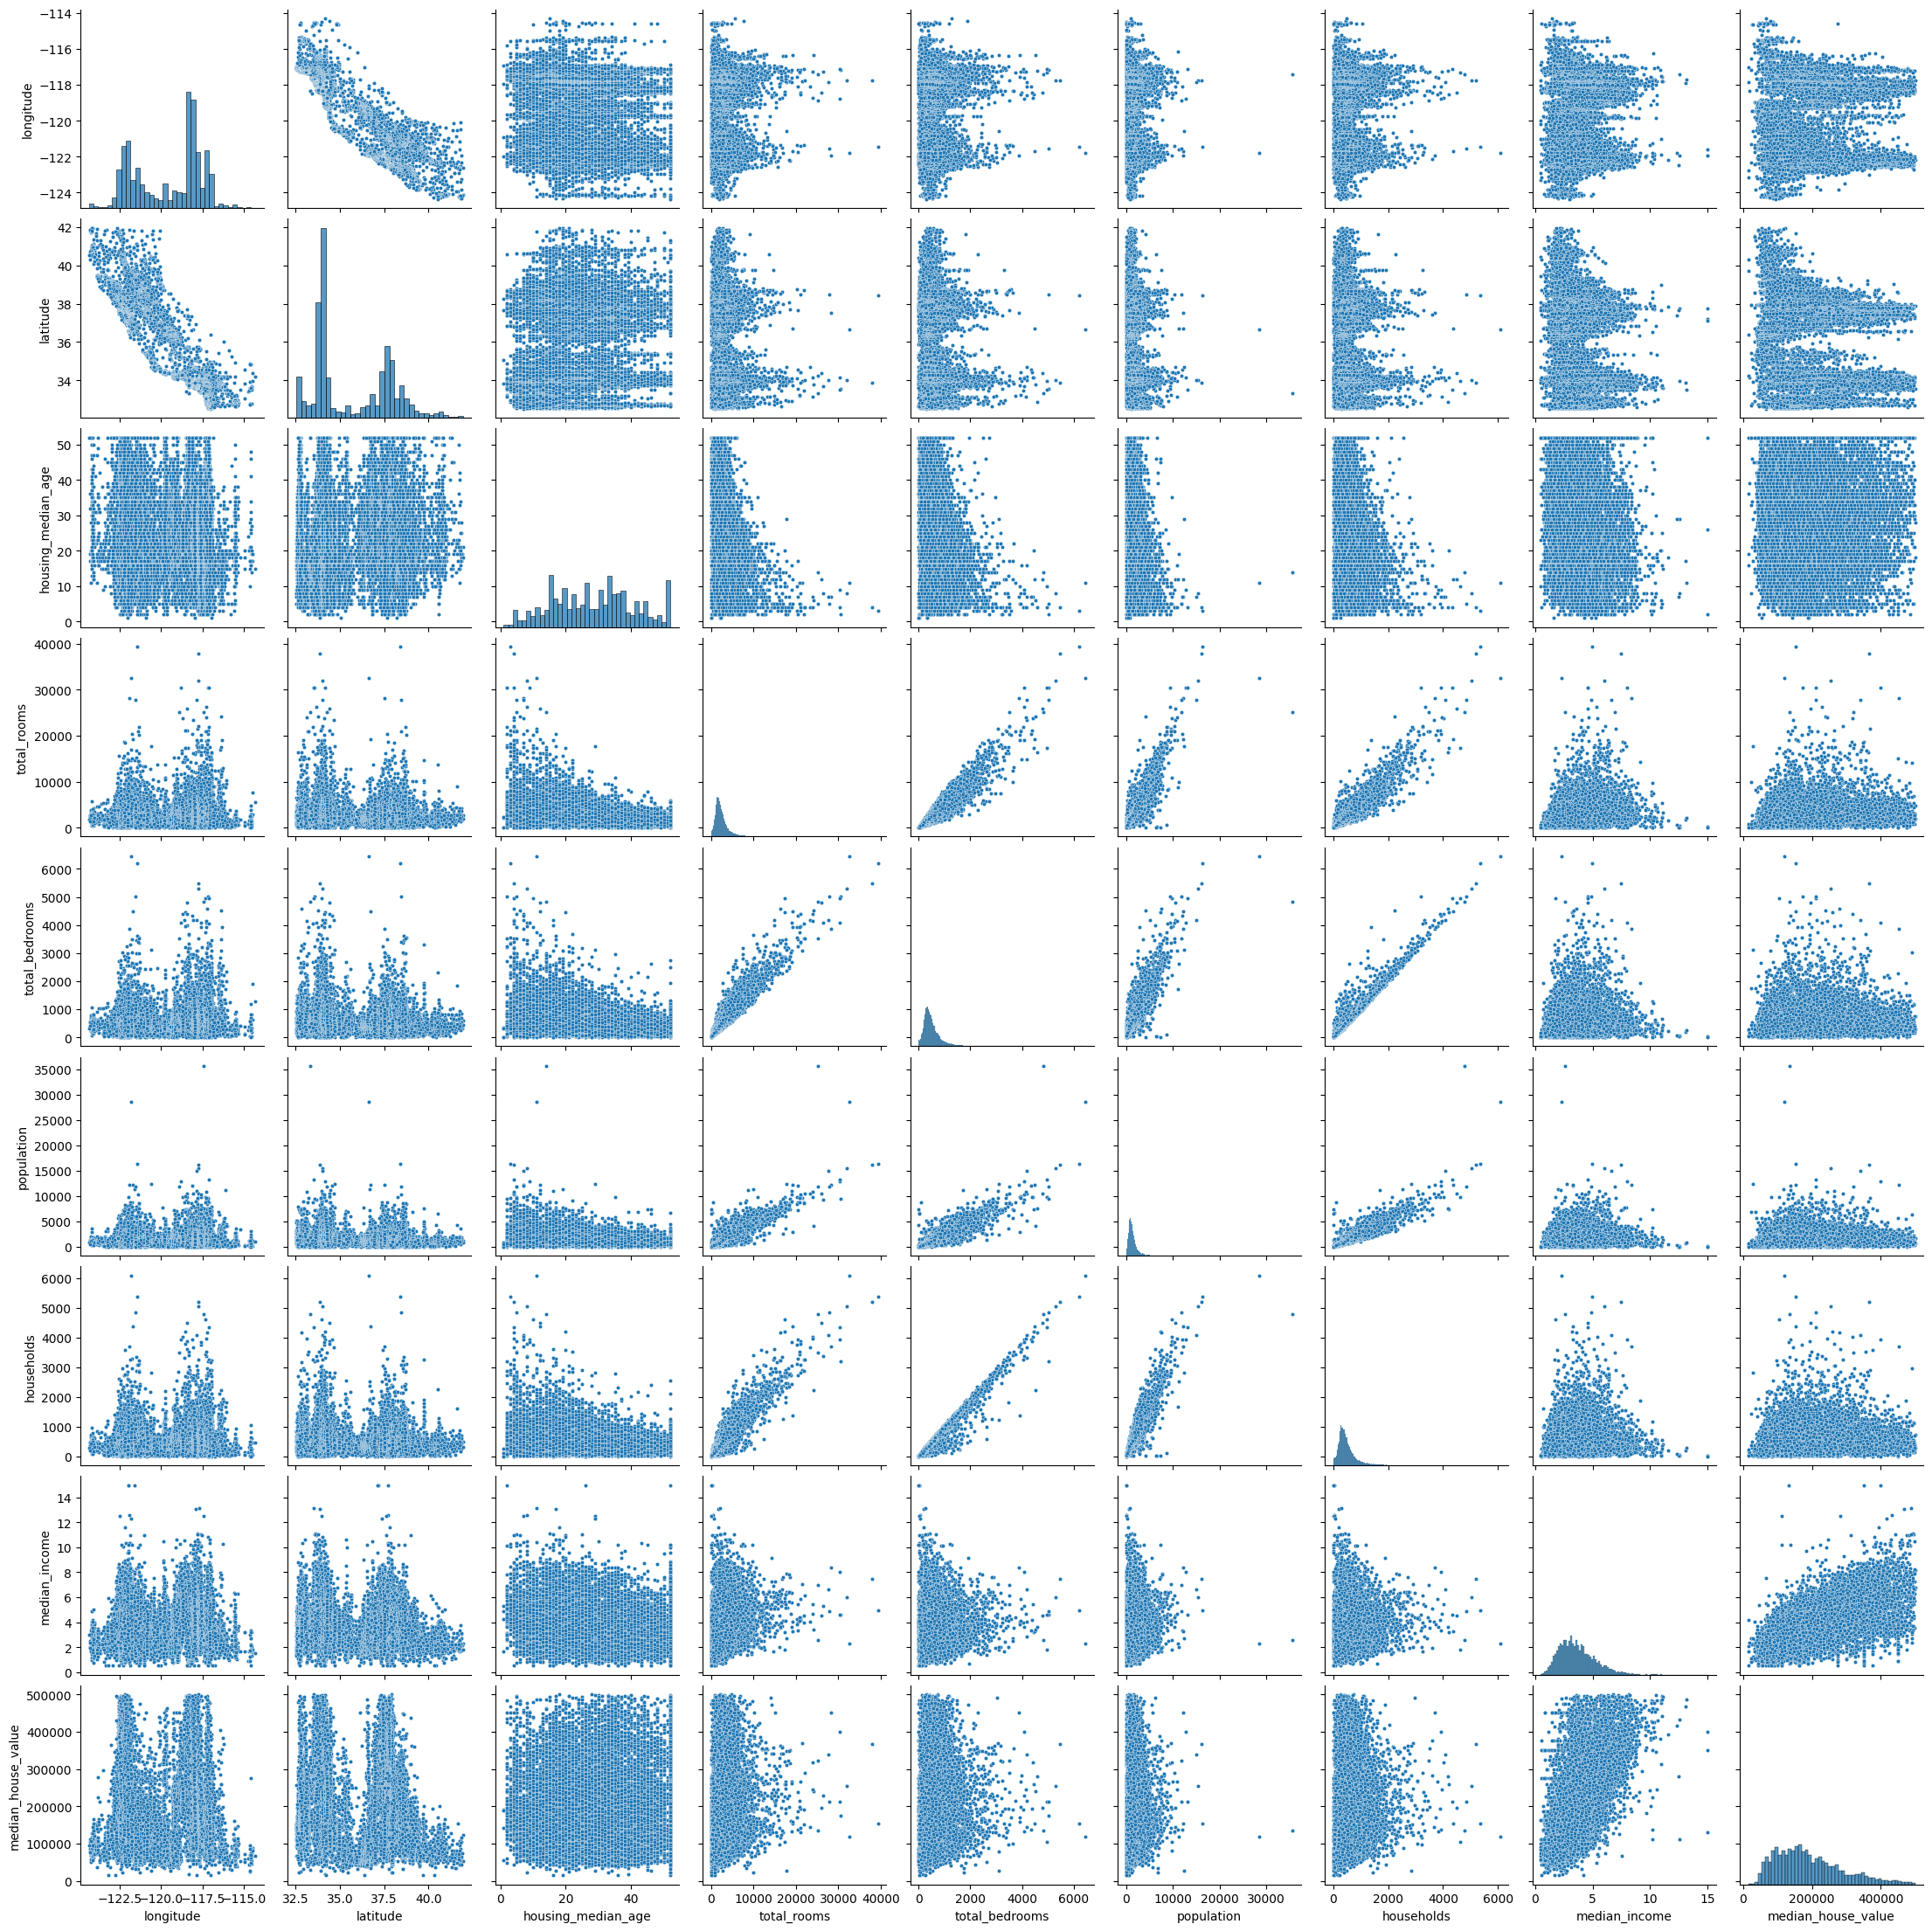

In [12]:
# sns.pairplot(housing[numerical_columns])
sns.pairplot(housing[numerical_columns], plot_kws={'s': 10})  

plt.show()

This gives us additional information, other than simply the correlation. It can give us additional information about the nature of the relationship between two variables - is it linear, is it quadratic, some other relationship? 

### 🚩 Exercise 7 (CORE)

Which variables in our data represent counts and how are they distributed? Use a probability plot `scipy.stats.probplot(df[variable], dist="norm")` to compare their distributions with a normal.

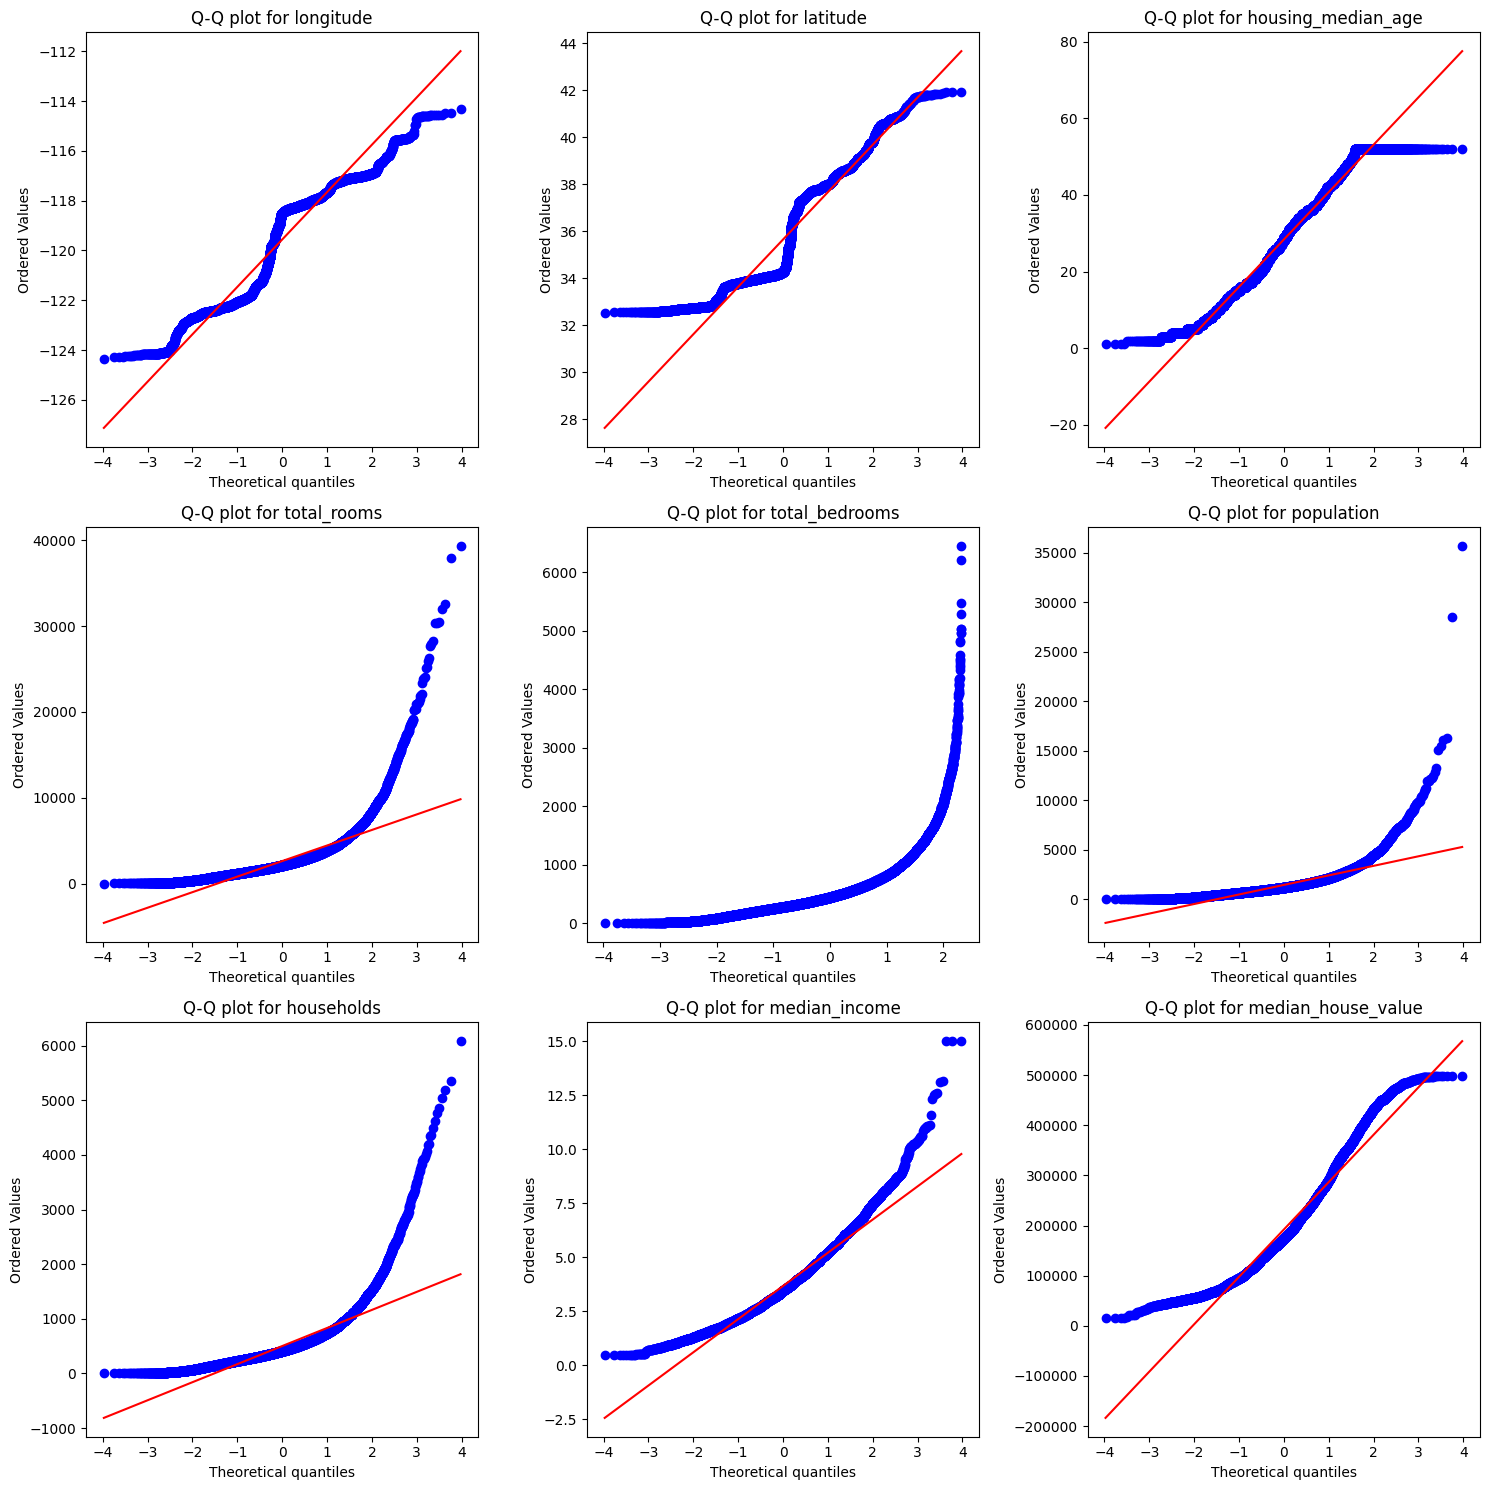

In [24]:



num_columns = 3 
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create Q-Q plots for each numeric column
for i, column in enumerate(numerical_columns):
    stats.probplot(housing[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot for {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Data Pre-Processing <a id='prep'></a>

Now we have some familiarity with the data though EDA, lets start preparing our data to be modelled.

From here on in, we should really be creating functions for our data transformations. This is because when we want to run data through our "model pipeline" in the future, rather than having to copy and paste a load of code, we can just use a series of functions. Later on the course, we will see this is useful when we split our data into training, validation, and test sets, but this would also be required if you deploy your model in a "live" environment. Furthermore, when refining a model it makes it easier for us to treat our preparation choices as "hyperparameters", meaning we can easily add or remove parts of our pipeline to see what works and what doesn't.

Its also worth examining what is meant by a **"Pipeline"**. 

- A general definition is that it is just a sequence of data preparation operations that is ensured to be reproducible. 

- However, we may want to ensure that any functions/classes we make for our pipeline have specific attributes that work best with the tools available in our chosen machine learning library. 

- In this course we are mostly going to be using `Scikit-learn`, with a little `Keras` at the end for neural networks.

__Scikit-learn__

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning (https://scikit-learn.org/stable/getting_started.html). 

It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. 

In Scikit-Learn a `Pipeline` is a class we can use to combine our pre-processing and modelling steps together (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

A `Pipeline` is useful for many reasons, including that they help prevent you from data leakage, i.e. disclosing some testing data in your training data. Objects that go into a scikit-learn `Pipeline` can either be _transformer_ or _estimator_ classes, or, if we use an imbalanced-learn `Pipeline` instead, also _resamplers_.

All three of these objects (_resamplers_, _transformers_, and _estimator_) all typically have a `.fit()` method, which is used to
- validate and interpret any parameters, 
- validate the input data, 
- estimate and store attributes from the parameters and provided data, 
- return the fitted estimator to facilitate method chaining in a pipeline. 

Along with other sample properties (e.g. `sample_weight`), the `.fit()` method usually takes two inputs:

> - The input matrix (or design matrix) X. The size of X is typically (n_samples, n_features), which means that samples are represented as rows and features are represented as columns.
>
> - The target values y which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. 
>
> https://scikit-learn.org/stable/getting_started.html

Other methods available for these objects other than `.fit()` will depend on what they are, so we will look at each of these objects in turn and then combine them into a model pipeline later in this workshop.

In general, it is good practice to adhere the **Scikit-Learn Design principles** when creating our pipeline steps.

>- __Nonproliferation of classes__. Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.
>- This means all our functions should **input and output Numpy arrays**. You can of course use pandas functions if you wish in your function, but just make sure that you convert the data back to output the Numpy array object! 
>- Otherwise, in some steps, there might appear some object/data type errors

Lets start by splitting our **features** from our **target** variable in the data set.

In [ ]:
# Extracting the features from the data
X = housing.drop("median_house_value", axis = 1)
features = list(X.columns)
print(features)

X = X.values
print(X) # Or display(X)
print(X.shape)

In [ ]:
# Extracting the target features from the data
y = housing["median_house_value"].copy()
y = y.values

print(y) # Or display(y_train)
print(y.shape)


## Data Cleaning

At this stage in our workflow we may want to deal with duplicated/missing values and (optionally) fix/remove outliers. Let's start with the former.

We want to remove duplicates as they may bias our fitted model. In other words, we may potentially *overfit* to this subset of points. However, care should usually be taken to check they are not _real_ data with identical values.

There a number of ways we could identify duplicates, the simplist (and the approach we'll focus on) is just to find observations with the same feature values. Of course this will not identify things such as spelling errors, missing values, address changes, use of aliases, etc. For those such things, more complicated methods along with manual assessment is needed.

### 🚩 Exercise 8 (CORE)

Are there any duplicated values in the data? If so how many?

<br>
<details><summary><b><u>Hint</b></u></summary>

With Pandas dataframes you can use `.duplicated()` to get a boolean of whether something is a duplicate and then use `.sum()` to count how many there are.
</details>

🏁 **Now, is a good point to switch driver and navigator**

### Outlier Detection

An **Outlier** is a data point that lies abnormally far from other observations and may distort the model fit and results. In general, it is a good idea to examine if any outliers are present during preprocessing.  However, it may not always be appropriate to drop these observations without explicit knowledge and testing if they are really outliers or not.

We will use basic statistics in order to try to identify outliers. A simple method of detecting outliers is to use the **inter-quartile range (IQR) proximity rule** (Tukey fences) which states that a value is an outlier if it falls outside these boundaries:

- Upper boundary = 75th quantile + (IQR * $k$) 

- Lower boundary = 25th quantile - (IQR * $k$)

where IQR = 75th quantile - 25th quantile (the length of the box in the box plot). Here, $k$ is a nonnegative constant which is typically set to 1.5. However, it is also common practice to find extreme values by setting $k$ to 3.

### 🚩 Exercise 9 (EXTRA)

Can you identify any potential outliers using the generated boxplots below ?

In [ ]:
fig, axes = plt.subplots(figsize = (20,10), ncols = X.shape[-1]//2, nrows = 2, sharex = True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(y = X[:,i], ax = ax) 
    ax.set_title(features[i])
    ax.set_ylabel("")
    
plt.suptitle("Boxplots")
plt.tight_layout()
plt.show()

- After detecting outliers we may want to set them to NA values so we can use subseqent methods, e.g to remove them (NA Removal). 

- In general, it is a good idea to make our methods into functions that are compatible with scikit-learn, so that we can use them in a `Pipeline` later on. 

- The removal of outliers is NOT an easy task, should not be applied all the time, especially if you are interested in rare events. In general, without any specific knowledge for the problem at hand or without statistical examination of outliers via suitable testing tools, it is not recommended to remove these observations by looking only at the above boxplots. 

- Another issue might be related to the sample size of your data set. Even though the `housing` data is large, in some cases, when you drop those observations you can discard important information unwittingly!

**For the sake of simplicity, we are keeping all observations at that moment for this workshop.** 

### Missing Data

Most ML models cannot handle missing values, and as we saw earlier, there are some present in `total_bedrooms`. 

There are a number of ways we can deal with missing values but to start with, let's just **remove NA values**. 
We can do this in two ways by either:

1. Getting rid of the corresponding observations (deleting the corresponding rows).
2. Getting rid of the whole attribute (deleting the corresponding columns).

To do this outside of a pipeline is relatively straight forward, we just run `housing.dropna()` with either the `axis` set to `0` or `1` (depending if we want to remove rows or columns) before splitting our data into features (`X`) and outputs (`y`). 

However if we want to do this in a pipeline we can use the _transformer_ [`DropMissingData`](https://feature-engine.trainindata.com/en/1.8.x/api_doc/imputation/DropMissingData.html) from `feature_engine.imputation`. Instead of simply dropping missing data, we may instead want to use other imputation methods are available in [`sklearn.impute`](https://scikit-learn.org/1.5/api/sklearn.impute.html). 

#### **Transfomers**

If we want to __alter the features__ of our data using a function that is compatible with a `Pipeline`, we need to a _transfomer_.

- Transformers are classes that follow the scikit-learn API in Scikit-Learn [clean](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing), [impute](https://scikit-learn.org/1.5/modules/impute.html), [reduce](https://scikit-learn.org/stable/modules/unsupervised_reduction.html#data-reduction), [expand](https://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation), or [generate](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction) feature representations.

- Transformers are classes with a `.fit()` method, which learn model parameters (e.g. mean for mean imputation) from a training set, and a `.transform()` method which applies this transformation model to data. To create a custom transformer, all you need is to create a class that implements three methods: `fit()`, `transform()`, and `fit_transform()`.

Therefore to transform a dataset, each sampler implements:

```
obj.fit(data)
data_transformed = obj.transform(data)
```

or simply...

```
data_transformed = obj.fit_transform(data)`
```

See more details: https://scikit-learn.org/stable/data_transforms.html. In the following subsections, we will see examples of _transformers_ for categorical and numerical variables.

### 🚩 Exercise 10  (CORE)

Use `dropMissingData` to remove the missing observations from `X`. What is the shape after dropping the missing observations?

__Notes__

- It may be tempting to overwrite `X` while working on our pre-processing steps. __Don't do this!__ We will run these objects through these steps inside our pipeline later so if you want to test your function make sure to assign the output to tempory objects (e.g. `X_`).

In [ ]:
from feature_engine.imputation import DropMissingData



Note that later in the course, we will also learn about  **Resamplers** which allow us to _alter the number observations_ in our data using a function that is compatible with a `Pipeline`. For more details: https://imbalanced-learn.org/stable/introduction.html

#### Data Imputation

Instead of removing the missing data we can set it to some value. To do this, Scikit-Learn gives us a handy [`SimpleImputer`](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html) method which provides simple strategies (e.g. `"mean"`, `"median"` for numerical features and `"most_frequent"` for categorical features). You can also add a missing indicator, which may be useful in the case when missing features may be provide information for predicting the target (e.g. obese patients may prefer not to report bmi, thus, this missingness could be useful for estimating the risk of health conditions or diseases). Beyond simple imputation strategies, sklearn also provides more advanced imputation strategies in [`IterativeImputer`](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) and [`KNNImputer`](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.KNNImputer.html). Other strategies are also available in `feature_engine.imputation`: https://feature-engine.trainindata.com/en/1.8.x/user_guide/imputation/index.html

In [ ]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")

X_imp = num_imputer.fit_transform(X)

When we applied this to our data, we get the following error:

```
ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float:
```

This is because the "median" strategy can only be used with numerical attributes so we need a way of only applying imputation to certain attributes. As with most things in Python, there are a number of options available to us (you may have already used one of them in answers to previous questions): 

- We could temporarily remove the categorical feature from our data to apply our function
```
X_num = X[:,:-1]
X_num = num_imputer.fit_transform(X_num)
```
- Apply the function to a subset of the data and assign the output to the same subset 
```
X[:,:-1] = num_imputer.fit_transform(X[:,:-1])
```

However scikit-learn has a handy function to specify what column we want to apply a function to (its also compatible with `Pipeline`s as well).

In [ ]:
from sklearn.compose import ColumnTransformer

num_cols_imputer = ColumnTransformer(
    # apply the `num_imputer` to all columns apart from the last
    [("num", num_imputer, list(range(X.shape[1] - 1)))],
    # don't touch all other columns, instead concatenate it on the end of the
    # changed data.
    remainder = "passthrough"
) 

X_ = num_cols_imputer.fit_transform(X)
print("Number of Missing Values")
pd.DataFrame(X_, columns = features).isna().sum()

After using `.fit` we can see that this method stores the median value for each attribute on the training set. This value can be used when validating and testing the model as it will be used if there is missing data in the new data.

__Note__
- To access the fitted `num_imputer` in this case, you first needed to subset the `transformers_` in `ColumnTransformer` to only the first tuple (`[0]`), and then get the second object (`[1]`) in the list (the `num_imputer`).

In [ ]:
display(num_cols_imputer.transformers_[0][1].statistics_)

🏁 **Now, is a good point to switch driver and navigator**

# Feature Engineering <a id='engin'></a>

As discussed in the lectures, feature engineering is where we extract features from data and transform them into formats that are suitable for machine learning models. Today, we will have a look at two main cases that are present in our data: **categorical** and **numerical** values.

Feature engineering also requires a _transformer_ class to __alter the features__.

## Categorical Variables

- In the dataset, we have an text attribute (`ocean_proximity`) that we already had to treat differently when cleaning the data. This extends to feature engineering as well, where we need to use separate methods than those used with numerical variables.

- If we look at the unique values of this attribute, we will see that there are a limited number of possible values which represent a category. We need a way of encoding this information into our modeling framework **by converting our string/categorical variable into a numeric representation** that can be included in our models.

If we have a binary categorical variable (two levels) we could do this by picking one of the categorical levels and encode it as 1 and the other level as 0. 

However, in this case as we have multiple categories, we would probably want to use another encoding method. To illustrate, we can try encoding the the categorical feature `ocean_proximity` using both the `OrdinalEncoder` and `OneHotEncoder` available in `sklearn.preprocessing`.

__Side Notes__

- The output of the `OneHotEncoder` provided in Scikit-Learn is a SciPy _sparse matrix_, instead of a NumPy array. These are useful when you have lots of categories as your matrix becomes mostly full of 0's. To store all these 0's takes up unneccesary memory, so instead a sparse matrix just stores the location of nonzero elements. The good news is that you can use a sparse matrix similar to a numpy matrix, but if you wanted to, you can convert it to a dense numpy matrix using `.toarray()`.

- The above does not seem to be the case if passed through a `ColumnTransformer`.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Defining the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

encoder = ColumnTransformer([
    # pass through all columns with numerical values 
    ("num", "passthrough", list(range(X.shape[1] - 1))), 
    # apply the ordinal_encoder to the last column
    ("cat", ordinal_encoder, [X.shape[1] - 1]),
])

# fitting the encoder defined above
housing_cat_encoded = encoder.fit_transform(X) 

display(dict(zip(list(encoder.transformers_[1][1].categories_[0]), range(5))))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Defining the OneHotEncoder
onehot_encoder = OneHotEncoder()

encoder = ColumnTransformer([
    # pass through all columns with numerical values 
    ("num", "passthrough", list(range(X.shape[1] - 1))), 
    # apply the onehot_encoder to the last column
    ("cat", onehot_encoder, [X.shape[1] - 1]),
]) 

housing_cat_1hot = encoder.fit_transform(X) 
cats = pd.Series(X[:,-1]).unique()
pd.DataFrame(encoder.transformers_[1][1].transform(cats.reshape(-1, 1)).toarray(), columns = cats).astype(int)

### 🚩 Exercise 11 (CORE)

- What is the main difference between two methods regarding the obtained features ?

- Which encoding method do you think is most appropriate for this variable and why?

Another handy feature of `OneHotEncoder` and `OrdinalEncoder` is that infrequent categories can be aggregated into a single feature/value. The parameters to enable the gathering of infrequent categories are `min_frequency` and `max_categories`.

When there are many unordered categories, another useful encoding scheme is [`TargetEncoder`](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.TargetEncoder.html#sklearn.preprocessing.TargetEncoder) which uses the target mean conditioned on the categorical feature for encoding unordered categories. Whereas one-hot encoding would greatly inflate the feature space if there are a very large number of categories (e.g. zip code or region), `TargetEncoder` is more parsimonious. 

### 🚩 Exercise 12 (EXTRA)

Use the `max_categories` attribute to set the maximum number of categories to 4. Use the `get_feature_names_out()` method of `OneHotEncoder` to print the new category names. Which two features have been combined?


## Numerical Variables

### Box-Cox Transformation

In some cases, we may wish to apply transformations to our data, so that they have a more Gaussian distribution. For example, log transformations are useful for altering count data to have a more normal distribution as they pull in the more extreme high values relative to the median, while stretching back extreme low values away from the median. You can use a log transformation with either the pre-made `LogTransformer()` from `feature_engine.transformation`, or a custom function and `sklearn.preprocessing.FunctionTransformer`.

More generally, the natural logarithm, square root, and inverse transformations are special cases of the **Box-Cox** family of transformations (Box and Cox 1964). The question is why do we need such a transformation and when? 

- Note that, the method is typically used to transform the outcome, but can also be used to transform predictors. 

- The method assumes that the variable takes only positive values. If there are any zero or negative values, a modification of the Box-Cox that allows non-positive values (Box-Cox with negatives, BCN) can be used (Hawkins and Weisberg 2017). 

- If there are zero values, but no negative values, an option is to add a small number (e.g. 1) before carrying out the transformation, although if there are a large number of zero values then it is possible no Box-Cox transformation will sufficiently normalize the variable.

- In general, transormations can make interpretations more difficult, thus you should think carefully if they are needed, particullarly if they only result in modest improvements in model performance. Moreover, finding a suitable transformation is typically a trial-and-error process.  

Originally, the Box-Cox procedure was developed to transform the outcome and uses maximum likelihood estimation to estimate a transformation parameter $\lambda$.

$\tilde{y} = \left\{ \begin{array}{l l} \frac{y^{\lambda} - 1}{\lambda}, & \lambda \neq 0 \\ \log y, & \lambda = 0 \\ \end{array} \right.$

- $\lambda$ is estimated from the data. 

- Because the parameter of interest is in the exponent, this type of transformation is called a power transformation

- Some values of $\lambda$ map to common transformations, such as;

    >* $\lambda = 1$ (no transformation)   
    >* $\lambda = 0$ (log)   
    >* $\lambda = 0.5$ (square root)   
    >* $\lambda = -1$ (inverse)

- Using the code below, if `lmbda=None` then the function will "find the lambda that maximizes the log-likelihood function and return it as the second output argument"

- Notice that we can not use `lambda` directly since it conflicts with the available object called `lambda`, this is the reason we preferred the indicator name as `lmbda`



In [ ]:
fig, axes = plt.subplots(figsize = (15,5), ncols = 4, nrows=2, sharey = True)
axes = axes.flatten()
sns.histplot(data = X[:,6], ax = axes[0])
axes[0].set_title("Raw Counts")

for i, lmbda in enumerate([0, 0.25, 0.5, 0.75, 1., 1.25, 1.5]):
    
    house_box_ = stats.boxcox(X[:, 6].astype(float), lmbda = lmbda)
    sns.histplot(data = house_box_, ax = axes[i + 1])
    axes[i + 1].set_title("$\lambda$ = {}".format(lmbda))
    
plt.tight_layout()
plt.show()

### 🚩 Exercise 13 (EXTRA)

- For the variable `households`, based on the `boxcox` transform shown above, which values of $\lambda$ may be useful? 

- Apply a similar code snippet to `median_house_value`. Which values of $\lambda$ may be useful?

## Other feature types

Feature engineering for other feature types beyond numerical categorical are also available in sklearn (e.g. for [text and images](https://scikit-learn.org/1.5/api/sklearn.feature_extraction.html)) and feature engine (e.g. for [Datetime](https://feature-engine.trainindata.com/en/1.8.x/user_guide/datetime/index.html) and for [time series](https://feature-engine.trainindata.com/en/1.8.x/user_guide/timeseries/index.html)). 

## Feature Combinations

- Looking at the datas attributes we may also want to manually combine them into features that are either a more meaningful representation of the data or have better properties.

- For example, we know **the number of rooms** in a district, but this may be more useful to combine with the **number of households** so that we have **a measure of rooms per household**.

In [ ]:
col_names = "total_rooms", "households"
rooms_ix, households_ix = [housing.columns.get_loc(c) for c in col_names] 

rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
rooms_per_household


### 🚩 Exercise 14 (EXTRA)

- Can you think of other combinations that may be useful?

- Create a custom transformer that creates these new combinations of features using the `FunctionTransformer`.

<br />
<details><summary><b><u>Hint</b></u></summary>
What about the following?
   
- `population_per_household`
    
- `bedrooms_per_room`
    
</details>

🏁 **Now, is a good point to switch driver and navigator**

## Feature Scaling

As we will discuss in later weeks, many machine learning algorithms are sensitive to the scale and magnitude of the features, and especially differences in scales across features. For these algorithms, feature scaling will improve performance. 

For example, let's investigate the range of the features in our dataset:

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.boxplot(X[:,:-1], vert = False) 
plt.xscale("symlog") 
plt.ylabel("Feature") 
plt.xlabel("Feature Range")

ax.set_yticklabels(features[:-1])

plt.suptitle("Feature Range for the Training Set")
plt.tight_layout()
plt.show()

There are various options in scikit learn for feature scaling: 

- Standardization (`preprocessing.StandardScaler`)

- Min-Max Scaling (`preprocessing.MinMaxScaler`)

- l2 Normalization (`preprocessing.normalize`)

- RobustScaler(`preprocessing.RobustScaler`)

- Scale with maximum absolute value (`preprocessing.MaxAbsScaler`)

>- As scaling generally improves the performance of most models when features cover a range of scales, it is probably a good idea to apply some sort of scaling to our data before fitting a model. 
>- *Standardization* (or *variance scaling*), is the most common, but there are a number of other types, as listed above.

### 🚩 Exercise 15 (EXTRA)

Try implementing different scalers for the `total_rooms` variable to see the main differences. 

## Combining into a Pipeline

Due to the focus of this week, lets look at combining different feature engineering steps together to make different model pipelines.

- We want to create a basic model pipeline that treats the **numerical** and **categorical** attributes differently. 
- To achive this we are going to use a combination of `Pipeline` and `ColumnTransformer` objects.
- We also need to supply the pipeline with a model. For now let's use a linear regression model, which we will learn in more details in week 4.

We can of course do this outside of a pipeline, but remember to be careful about data leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(display='diagram')

numcols = list(range(X.shape[1]-1))
catcols = [X.shape[1]-1]

num_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_impute", SimpleImputer(strategy="constant")),
    ("cat_encode", OneHotEncoder(drop='first'))])

reg_pipe_1 = Pipeline([
    ("pre_processing", ColumnTransformer([("num_pre", num_pre, numcols),
                                          ("cat_pre", cat_pre, catcols)])),
    ("model", LinearRegression())
])

# Alternative and equivalent model avoiding nested pipelines
# reg_pipe_1 = Pipeline([
#     ("impute", ColumnTransformer([("num_imp", SimpleImputer(strategy="median"), numcols),
#                                           ("cat_imp", SimpleImputer(strategy="constant"), catcols)])),
#     ("transform", ColumnTransformer([("num_trns", StandardScaler(), numcols),
#                                           ("cat_trns", OneHotEncoder(drop='first'), catcols)])),                                     
#     ("model", LinearRegression())
# ])

display(reg_pipe_1)

In [ ]:
reg_pipe_1.fit(X,y)
# Print the R squared (ranges 0 to 1, with higher values better)
print(round(reg_pipe_1.score(X, y), 3))

In [ ]:
# Print the coeffcients
reg_pipe_1[1].coef_
# reg_pipe_1['model'].coef_

Let's try some other combinations of the pre-processing and feature engineering steps that we have learned about this week.

In [ ]:
# NOTE: ADDITIONAL transformer for the pipeline
# Creating the Transformer for box-cox implementation 
from sklearn.preprocessing import FunctionTransformer

def boxcoxarray(X, y=None, lmbda=None):
    X_ = X.copy()
    for i in range(X.shape[1]):
        if lmbda == None:
            X_[:,i], bc_params_ = stats.boxcox(X_[:,i], lmbda = lmbda)
        else:
            X_[:,i] = stats.boxcox(X_[:,i], lmbda = lmbda)
    return X_

# Creating our transformer from the pre-defined boxcoxarray callable function:
boxtransformer = FunctionTransformer(boxcoxarray, validate = True)

In [ ]:
# Reg Pipe 2 

# Define column indices
numcols = [0, 1, 2, 7]
countcols = [3, 4, 5, 6]
catcols = [8]

# Reg Pipe 2 
num_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_scale", StandardScaler())])

count_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_transform", boxtransformer),
    ("num_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_impute", SimpleImputer(strategy="constant")),
    ("cat_encode", OneHotEncoder(drop='first'))])

# Overall ML pipeline inlcuding all 
reg_pipe_2 = Pipeline([
    ("pre_processing", ColumnTransformer([
        ("num_pre", num_pre, numcols), # Applied to the columns/variables in 0, 1, 2, 7 index
        ("count_pre", count_pre, countcols), # Applied to the columns/variables in 3, 4, 5, 6 index
        ("cat_pre", cat_pre, catcols)])), # Applied to the columns/variables in 8 index only (ocean_proximity)
        ("model", LinearRegression())
])


display(reg_pipe_2)

In [ ]:
reg_pipe_2.fit(X,y)
# Print the R squared (ranges 0 to 1, with higher values better)
print(round(reg_pipe_2.score(X, y), 3))

In [ ]:
# Print the coeffcients
reg_pipe_2[1].coef_

In [ ]:
# Reg Pipe 3
from feature_engine.transformation import LogTransformer

numcols = [0, 1]
countcols = [2, 3, 4, 5, 6,7]
catcols = [8]

num_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_scale", StandardScaler())])

num2_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_transform", LogTransformer()),
    ("num_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_impute", SimpleImputer(strategy="constant")),
    ("cat_encode", OneHotEncoder(drop='first'))])

# Overall ML pipeline inlcuding all 
reg_pipe_3 = Pipeline([
    ("pre_processing", ColumnTransformer([
        ("num_pre", num_pre, numcols), # Applied to the columns/variables in 0, 1 index
        ("num2_pre", count_pre, countcols), # Applied to the columns/variables in 2, 3, 4, 5, 6, 7 index
        ("cat_pre", cat_pre, catcols)])), # Applied to the columns/variables in 8 index only (ocean_proximity)
        ("model", LinearRegression())
])

display(reg_pipe_3)

In [ ]:
reg_pipe_3.fit(X,y)
# Print the R squared (ranges 0 to 1, with higher values better)
print(round(reg_pipe_3.score(X, y), 3))

In [ ]:
# Print the coeffcients
reg_pipe_3[1].coef_

### 🚩 Exercise 16 (CORE)

Explain in words what are the differences in pre-processing and feature engineering steps in the three models above. 

### 🚩 Exercise 17 (EXTRA)

Try to create your own pipeline by modifying at least one of the pre-processing and feature engineering steps above. What have you decided to change and why?

# Summary <a id='sum'></a>

This week we covered a lot of ground!

- We've looked at some methods for pre-processing our data, cleaning and preparing it, as well as how to engineer some features. 

- This is by **no means a complete collection of all the methods available** as covering more would go beyond the scope of this course (for those interested in learning more, have a look though the given companion readings). 

- For example, we did not touch on handling text and dates/time much. These topics are quite complex and have enough materials to cover their own courses.

# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please go to Edit -> Edit Notebook Metadata and change 'Student 1' and 'Student 2' in the **name** attribute to include your name. If you are not able to edit the Metadata, then please add a markdown cell at the beginning with the names of all group members. 

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [ ]:
!jupyter nbconvert --to pdf mlp_week01.ipynb 

Once generated, please submit this PDF on Learn page by 16:00 PM on the Friday of the week the workshop was given. Note that:

>- You don't need to finish everything, but you should have had a substantial attempt at the bulk of the material, particularly the CORE tasks. 
>- If you are having trouble generating the pdf, please ask a tutor or post on piazza. 
>- As a back option, you can simply select the print option in your browser which should generate a high-quality pdf of your complete notebook. Basically, right click → Click Print → Choose 'Save as PDF' option instead of default printing destination (Check that your all materials are visible in the print preview) → Click 'Save' to get your pdf file.